In [181]:
query = '2020기아'

# 백분위수구하기

In [83]:
import numpy as np

In [1]:
import pandas as pd

In [113]:
from matplotlib import pyplot as plt

In [182]:
cols = ['date', 'count']
tweet = pd.read_csv("./현기차트윗갯수/{}트윗갯수.csv".format(query), encoding = 'utf-8', header = None, names = cols, index_col = 0)

In [183]:
tweet.head()

,date,count
0,2020-01-01,2778
1,2020-01-02,3265
2,2020-01-03,3373
3,2020-01-04,2999
4,2020-01-05,2918


In [184]:
tweet.isnull().any()

date     False
count    False
dtype: bool

In [185]:
tweet['count'].quantile(q=0.5, interpolation='nearest')

3471

In [186]:
count = tweet['count']

In [187]:
np.var(count)

235640.5536146197

In [188]:
np.std(count)

485.42821674746074

In [189]:
tweet.describe()

,count
count,61.000000
mean,3555.655738
std,489.456736
min,2778.000000
25%,3276.000000
50%,3471.000000
75%,3740.000000
max,5353.000000


In [190]:
q75, q25 = np.percentile(count, [75 ,25])
iqr = q75 - q25
print(iqr)

464.0


https://ratsgo.github.io/statistics/2017/06/22/median/
# 공분산 분석, 평균 0으로 맞추기 등

분위수
모집단 분포의 위치를 나타내는 대표값으로서 제p백분위수(pth percentile)가 있습니다. 특성값을 작은 것부터 순서대로 나열하였을 때 p% 이상의 특성값이 그 값보다 작거나 같고, 또한 (100−p)%의 특성값이 그 값보다 크거나 같게 되는 값으로 정의됩니다. 특히 제25백분위수를 제1사분위수(first quartile), 제50백분위수를 중앙값(median), 제75백분위수를 제3사분위수(third quartile)이라고 하며 각각 Q1, Q2, Q3로 표시합니다.

이 가운데 모중앙값 Q2는 모평균 μ와 같이 모집단 분포의 중심위치를 나타내며 특성값이 연속적인 무한 모집단의 경우에는 밀도곡선의 전체 넓이를 이등분하는 점이 됩니다. 모중앙값은 추정 이론의 어려움 때문에 모평균처럼 통상적으로 고려되는 추론의 대상은 아니지만, 비모수통계학(non-parametric statistics)에선 중요 고려 대상이 됩니다. 제p백분위수를 파이썬 코드로 나타내면 다음과 같습니다.

In [20]:
def percentile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

중앙값
중앙값을 파이썬 코드로 나타내면 다음과 같습니다.

In [25]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # 데이터 포인트의 개수가 홀수면 중앙값을 반환
        return sorted_v[midpoint]
    else:
        # 데이터 포인트의 개수가 짝수면 두 중앙값의 평균을 반환
        lo = midpoint - 1
        hi = midpoint
        return (sorted(v)[lo] + sorted(v)[hi]) / 2

산포
산포(dispersion)란 모집단에서 특성값이 흩어져 있는 상태를 뜻합니다. 산포에 관련된 대표적인 측도로 분산(variance)이 있습니다만 이 글 다른 꼭지에서 따로 다루겠습니다. 가장 간단한 형태의 산포 측도는 가장 큰 값과 작은 값의 차이를 나타내는 범위(range)일 겁니다. 다음과 같습니다.

In [26]:
def data_range(x):
    return max(x) - min(x)

사분위수 범위
산포를 나타내는 다른 지표로 사분위수범위(interquantile range)가 있습니다. 제3사분위수와 제1사분위수의 차로 정의되며, 모집단에서 가운데 50% 특성값의 범위를 나타냅니다. 몇몇 이상치가 주는 영향을 제거해 모집단의 산포를 가늠하는 데 유용한 지표로 알려져 있습니다. 사분위수범위의 파이썬 코드는 다음과 같습니다.

In [174]:
# 몇몇 이상치가 주는 영향을 제거해 관측치 편차 비교할 때 유용
def iqr(x):
    return percentile(x, 0.75) - percentile(x, 0.25)

In [175]:
iqr(count)

TypeError: 'int' object is not callable

평균을 0으로 맞추기
분산과 공분산을 구하려면 데이터의 평균을 0으로 맞추는 것이 여러모로 편리합니다. 이를 위한 함수를 정의했습니다.

In [23]:
def de_mean(x):
    #x의 모든 데이터 포인트에서 평균을 뺌
    n = len(x)
    x_bar = sum(x) / n
    return [x_i - x_bar for x_i in x]

# 분산과 표준편차
분산은 데이터의 평균과 각 특성값의 차(편차)를 제곱하여 산술평균한 것입니다. 표준편차는 분산의 제곱근입니다. 분산과 표준편차가 작을 수록 평균값에서 특성값들 사이의 거리가 가깝다는 걸 의미합니다. 이와 관련된 파이썬 코드는 다음과 같습니다.

In [22]:
# 분산
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    sum_of_squares = sum([x_i ** 2 for x_i in deviations])
    return sum_of_squares / (n - 1)

# 표준편차
def standard_deviation(x):
    return variance(x) ** 0.5

# 공분산과 상관관계(여기선 안씀)
상관계수(correlation coefficient)는 두 확률변수의 직선관계가 얼마나 강하고 어떤 방향인지를 나타냅니다. 상관계수에 각 확률변수의 표준편차에 해당하는 값을 곱한 것을 공분산(covariance)이라고 합니다. 파이썬 코드는 다음과 같습니다.

In [24]:
import numpy as np
def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

In [50]:
'''def percentiles(x):
    min_x = x.min()
    max_x = x.max()
    percentiles = (x - min_x) / (max_x - min_x) 
    return percentiles
'''

In [52]:
'''my_perc = percentiles(count)
with open('./현기차트윗갯수/2020현대_백분위.csv', 'w', encoding = 'utf-8') as f:
    for i, item in enumerate(my_perc):
        f.write("{},{}\n".format(i, item))
'''

# Percentile Rank 구하기

In [191]:
tweet['Percentile_rank']=tweet['count'].rank(pct=True)
print(tweet)

          date  count  Percentile_rank
0   2020-01-01   2778         0.016393
1   2020-01-02   3265         0.213115
2   2020-01-03   3373         0.360656
3   2020-01-04   2999         0.081967
4   2020-01-05   2918         0.065574
..         ...    ...              ...
56  2020-02-26   3744         0.770492
57  2020-02-27   3589         0.590164
58  2020-02-28   3800         0.819672
59  2020-02-29   3787         0.803279
60  2020-03-01   3471         0.508197

[61 rows x 3 columns]


In [192]:
tweet.head()

,date,count,Percentile_rank
0,2020-01-01,2778,0.016393
1,2020-01-02,3265,0.213115
2,2020-01-03,3373,0.360656
3,2020-01-04,2999,0.081967
4,2020-01-05,2918,0.065574


In [193]:
tweet.to_csv('./현기차트윗갯수/{}_백분위계산.csv'.format(query), encoding = 'utf-8')

In [194]:
'''#scipy와 검증하기. rank와 결과 똑같음!
from scipy.stats import percentileofscore
percentile = 1919
print(percentileofscore(count, percentile))
'''

'#scipy와 검증하기. rank와 결과 똑같음!\nfrom scipy.stats import percentileofscore\npercentile = 1919\nprint(percentileofscore(count, percentile))\n'

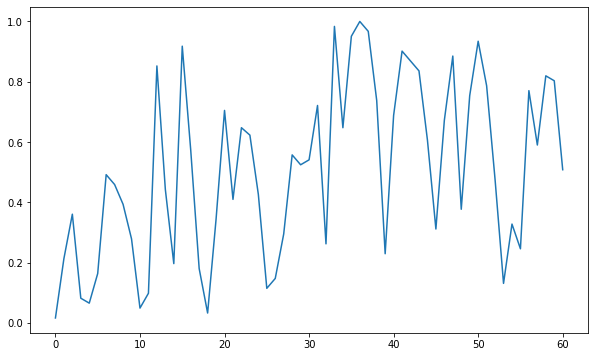

In [195]:
plt.figure(figsize = (10,6))
#plt.plot(tweet['date'], tweet['Percentile_rank'])
plt.plot(tweet['Percentile_rank'])
plt.savefig('./현기차트윗갯수/{}_백분위그래프.png'.format(query), dpi = 100)